<a href="https://colab.research.google.com/github/ethanpnguyen/ds4e/blob/main/notebooks/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## House Prices:

Can you predict sales prices of houses in Melbourne?

In [31]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

### Read Data

In [24]:
dfMlb = pd.read_csv('/content/house_prices.csv')
dfMlb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [25]:
dfMlb.columns.values

array(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype=object)

In [26]:
x = dfMlb.loc[:, ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']]
y = dfMlb.loc[:, ['Price']]

In [27]:
x.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.534242,558.416127,-37.809203,144.995216
std,0.955748,0.691712,3990.669241,0.079260,0.103916
min,1.000000,0.000000,0.000000,-38.182550,144.431810
25%,2.000000,1.000000,177.000000,-37.856822,144.929600
50%,3.000000,1.000000,440.000000,-37.802355,145.000100
75%,3.000000,2.000000,651.000000,-37.756400,145.058305
max,10.000000,8.000000,433014.000000,-37.408530,145.526350


### Build Model

1. Define the appropraite model
2. Fit the data to the model
3. Predict new data points using fitted model
4. Evaluate model with respect to actual data

In [71]:
mdlDtrMlb = DecisionTreeRegressor()
mdlDtrMlb.fit(x, y)

DecisionTreeRegressor()

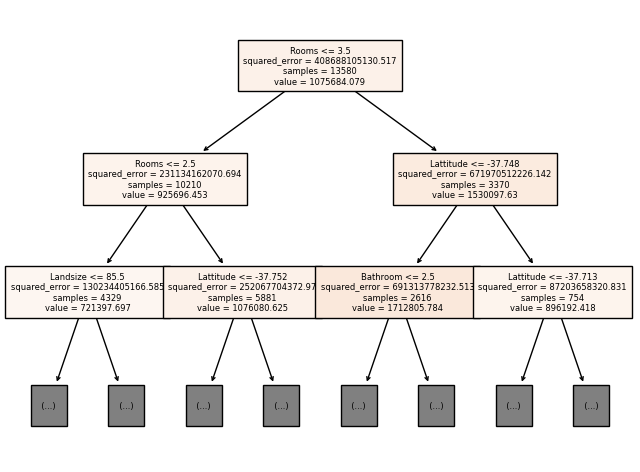

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6), dpi=100)
plot_tree(mdlDtrMlb, max_depth=2, feature_names=x.columns, fontsize=6, filled=True)
plt.show()

In [73]:
y_pred = mdlDtrMlb.predict(x)
print(y_pred)
print(y.head())

[1480000. 1035000. 1465000. ... 1170000. 2500000. 1285000.]
       Price
0  1480000.0
1  1035000.0
2  1465000.0
3   850000.0
4  1600000.0


In [74]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, y_pred)

1125.1804614629357

Want to avoid:
1. Underfitting -> high bias (0% Train)
2. Overfitting -> high variance (100% Train)